In [101]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from os import listdir
from os.path import join
from matplotlib.colors import LogNorm

In [35]:
path = "/Users/dgagne/data/cam_mp_files_run2_csv/"
mp_files = sorted(listdir(path))
mp_data_list = []
for mp_file in mp_files[:10]:
    print(mp_file)
    mp_data_list.append(pd.read_csv(join(path, mp_file), index_col="Index"))
mp_data = pd.concat(mp_data_list, ignore_index=True)
del mp_data_list[:]
del mp_data_list

cam_mp_data_run2_000000.csv.gz
cam_mp_data_run2_000123.csv.gz
cam_mp_data_run2_000246.csv.gz
cam_mp_data_run2_000369.csv.gz
cam_mp_data_run2_000492.csv.gz
cam_mp_data_run2_000615.csv.gz
cam_mp_data_run2_000738.csv.gz
cam_mp_data_run2_000861.csv.gz
cam_mp_data_run2_000984.csv.gz
cam_mp_data_run2_001107.csv.gz


In [36]:
mp_data["lambda_c"] =(np.pi * 1000.0 * mp_data["NC_TAU_in"] / (
    mp_data["RHO_CLUBB_lev"] * mp_data["QC_TAU_in"])) ** 0.25
mp_data["lambda_r"] =(np.pi * 1000.0 * mp_data["NR_TAU_in"] / (
    mp_data["RHO_CLUBB_lev"] * mp_data["QR_TAU_in"])) ** 0.25

In [14]:
mp_data.columns

Index(['lat', 'lev', 'lon', 'P0', 'PS', 'depth', 'row', 'col', 'hyam', 'hybm',
       'pressure', 'temperature', 'RHO_CLUBB_lev', 'RHO_CLUBB_top',
       'RHO_CLUBB_bottom', 'QC_TAU_in', 'NC_TAU_in', 'QR_TAU_in', 'NR_TAU_in',
       'qctend_MG2', 'qctend_TAU', 'nctend_MG2', 'nctend_TAU', 'qrtend_MG2',
       'qrtend_TAU', 'nrtend_MG2', 'nrtend_TAU', 'time', 'lambda_c',
       'lambda_r'],
      dtype='object')

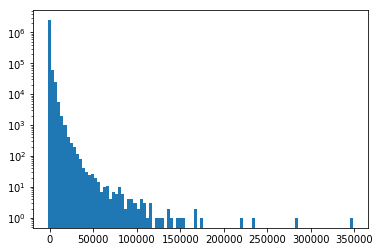

In [20]:
plt.hist(mp_data["nrtend_MG2"], bins=100)
plt.gca().set_yscale("log")

In [25]:
np.count_nonzero((mp_data["nrtend_MG2"] > 0).values)

2006072

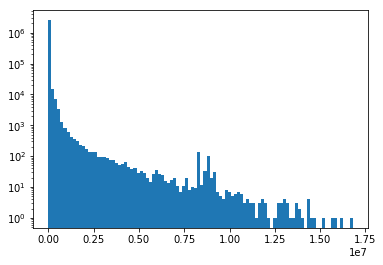

In [28]:
plt.hist(mp_data["lambda_c"], bins=100)
plt.gca().set_yscale("log")

In [33]:
np.count_nonzero(mp_data["QR_TAU_in"] == 0)

2224

In [240]:
diameters = np.logspace(-4, -1, 50)
def size_distribution(diameters, l, n):
    return n * np.exp(-l * diameters)

size_dist_out = size_distribution(diameters, mp_data.loc[::5000, ["lambda_c"]].values, 
                  mp_data.loc[0::5000, ["NC_TAU_in"]].values)

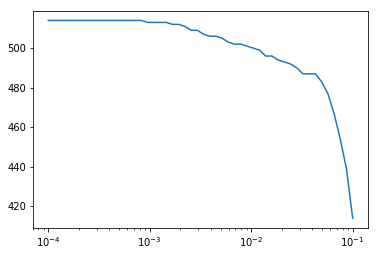

In [241]:
plt.semilogx(diameters, np.sum(size_dist_out > 0, axis=0))

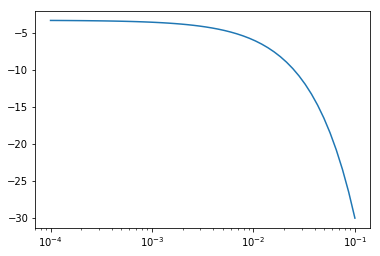

In [246]:
plt.semilogx(diameters, np.log10(size_dist_out[200]))


(1e-10, 10000000000.0)

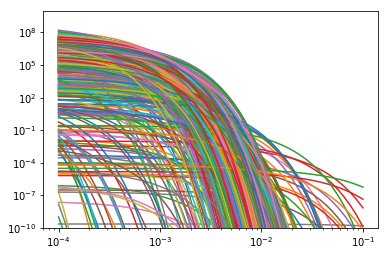

In [251]:
for size_dist_set in size_dist_out:
    plt.semilogx(diameters, size_dist_set)
plt.gca().set_yscale("log")
plt.ylim(1e-10, 1e10)

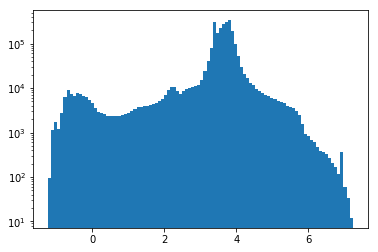

In [71]:
plt.hist(np.log10(mp_data["lambda_c"][~np.isinf(mp_data["lambda_c"])]), bins=100)
plt.gca().set_yscale("log")

(array([159798.,   2201.,  31508.,  37960.,  60103.,  92696., 247898.,
        372964., 871321., 688694.]),
 array([-27.63102112, -22.79169402, -17.95236692, -13.11303981,
         -8.27371271,  -3.43438561,   1.40494149,   6.24426859,
         11.08359569,  15.92292279,  20.76224989]),
 <a list of 10 Patch objects>)

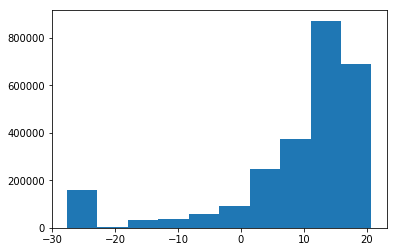

In [73]:
plt.hist(np.log(mp_data["NC_TAU_in"]))

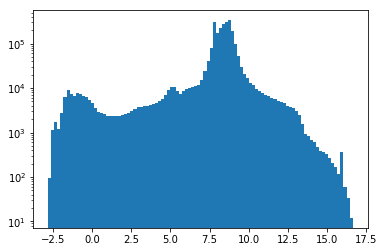

In [79]:
plt.hist(np.log(mp_data["lambda_c"]), bins=100)
plt.gca().set_yscale("log")

In [81]:
np.count_nonzero(mp_data["qctend_MG2"] == 0)

58076

In [96]:
mp_data.loc[mp_data["qctend_MG2"] == 0, 
            ["QC_TAU_in", "NC_TAU_in", "QR_TAU_in", "NR_TAU_in", "RHO_CLUBB_lev"]].max()

QC_TAU_in        9.986938e-09
NC_TAU_in        7.558291e+07
QR_TAU_in        2.913192e-06
NR_TAU_in        8.650278e+04
RHO_CLUBB_lev    1.544432e+00
dtype: float64

In [98]:
mp_data.loc[(mp_data["qctend_MG2"] < 0) & (mp_data["QC_TAU_in"] < 1e-10), 
            ["QC_TAU_in", "NC_TAU_in", "QR_TAU_in", "NR_TAU_in"]].max()

QC_TAU_in    9.999324e-11
NC_TAU_in    2.207581e+08
QR_TAU_in    2.116431e-03
NR_TAU_in    3.751111e+05
dtype: float64

(array([[502.,  nan,  nan, ...,  nan,   1.,  nan],
        [521.,  nan,  nan, ...,   3.,  nan,  nan],
        [500.,  nan,  nan, ...,   3.,  nan,  nan],
        ...,
        [431.,  nan,  nan, ...,   2.,   2.,  nan],
        [416.,  nan,  nan, ...,   1.,   1.,  nan],
        [479.,  nan,  nan, ...,   2.,  nan,   1.]]),
 array([-17.9999795 , -17.89998538, -17.79999127, -17.69999715,
        -17.60000303, -17.50000891, -17.40001479, -17.30002067,
        -17.20002656, -17.10003244, -17.00003832, -16.9000442 ,
        -16.80005008, -16.70005596, -16.60006185, -16.50006773,
        -16.40007361, -16.30007949, -16.20008537, -16.10009125,
        -16.00009714, -15.90010302, -15.8001089 , -15.70011478,
        -15.60012066, -15.50012654, -15.40013243, -15.30013831,
        -15.20014419, -15.10015007, -15.00015595, -14.90016183,
        -14.80016771, -14.7001736 , -14.60017948, -14.50018536,
        -14.40019124, -14.30019712, -14.200203  , -14.10020889,
        -14.00021477, -13.90022065, -13

/Users/dgagne/miniconda3/envs/deep/lib/python3.6/site-packages/matplotlib/colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


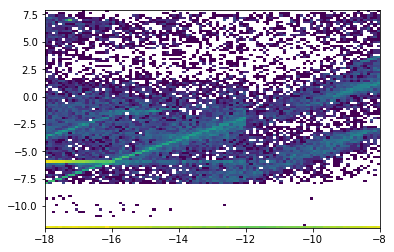

In [116]:
plt.hist2d(np.log10(mp_data.loc[mp_data["qctend_MG2"]==0, "QC_TAU_in"]),
           np.log10(mp_data.loc[mp_data["qctend_MG2"]==0, "NC_TAU_in"]),
           bins=100, cmin=1, norm=LogNorm())


/Users/dgagne/miniconda3/envs/deep/lib/python3.6/site-packages/matplotlib/colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


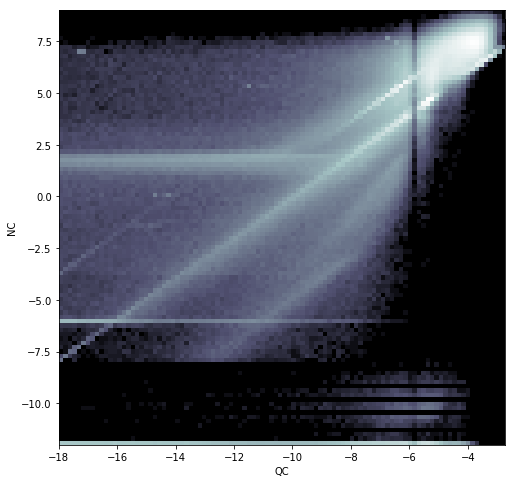

In [320]:
fig, ax = plt.subplots(1,1,figsize=(8, 8))
plt.hist2d(np.log10(mp_data.loc[mp_data["QC_TAU_in"] > 1e-18, "QC_TAU_in"]),
           np.log10(mp_data.loc[mp_data["QC_TAU_in"] > 1e-18,"NC_TAU_in"]),
           bins=100, cmin=1, norm=LogNorm(), cmap="bone")
ax.set_facecolor("k")
plt.xlabel("QC")
plt.ylabel("NC")
plt.savefig("qc_nc_enterprise.png", dpi=200, bbox_inches="tight")

In [326]:
mean_tau = mp_data[["QC_TAU_in", "NC_TAU_in", "qrtend_TAU"]].groupby(["QC_TAU_in", "NC_TAU_in"]).mean()

In [327]:
mean_ta.stack()

QC_TAU_in     NC_TAU_in               
1.000047e-18  9.962473e-07  qrtend_TAU    0.000000e+00
1.000118e-18  3.597339e+01  qrtend_TAU    1.167514e-28
1.000243e-18  1.000000e-12  qrtend_TAU    1.025519e-29
1.000341e-18  6.801627e-04  qrtend_TAU    0.000000e+00
1.000439e-18  1.000000e-12  qrtend_TAU    0.000000e+00
1.000612e-18  1.134420e+02  qrtend_TAU   -7.289075e-28
1.000718e-18  2.273761e+03  qrtend_TAU   -1.808069e-27
1.000747e-18  1.000000e-12  qrtend_TAU    0.000000e+00
1.000761e-18  1.694263e+02  qrtend_TAU   -2.839899e-27
1.000783e-18  5.309051e+02  qrtend_TAU    0.000000e+00
1.000800e-18  9.948468e-07  qrtend_TAU    0.000000e+00
1.000860e-18  1.312184e+02  qrtend_TAU    0.000000e+00
1.000880e-18  1.914806e+00  qrtend_TAU   -1.211690e-27
1.000968e-18  1.000000e-12  qrtend_TAU   -3.003982e-27
1.001033e-18  1.000000e-12  qrtend_TAU    0.000000e+00
1.001153e-18  1.051317e+01  qrtend_TAU    0.000000e+00
1.001210e-18  1.000000e-12  qrtend_TAU    0.000000e+00
1.001249e-18  1.000000e-12

In [117]:
np.log10(mp_data.loc[:,"NC_TAU_in"]).min()

-12.0

In [266]:
mp_data

(2565143, 30)

In [271]:
np.count_nonzero((mp_data["QC_TAU_in"] > 1e-6) & (mp_data["NC_TAU_in"] > 1e3)) / mp_data.shape[0]

0.5646878166246482

In [127]:
mp_data.loc[mp_data["qctend_TAU"] < -1e-8,"NC_TAU_in"].min()

1e-12

In [128]:
mp_data["qctend_TAU"].max()

4.7864806e-21

In [131]:
mp_data["qrtend_TAU"].min()

-5.95709e-22

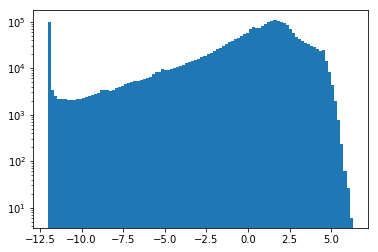

In [161]:
plt.hist(np.log10(mp_data["NR_TAU_in"][mp_data["NR_TAU_in"] > 0]), bins=100)
plt.gca().set_yscale("log")

In [170]:
np.count_nonzero((mp_data["NC_TAU_in"] > 1e-12) & (mp_data["NR_TAU_in"] > 1e-12))

2364040

(array([3181., 4196., 4725.,  836.,  532.,  348.,   63.,  222.,   93.,
          70.,  119.,  132.,  139.,   92.,  125.,  192.,  434.,  942.,
        2167.,  514.]),
 array([ 10331.71266317,  15017.37290738,  19703.03315159,  24388.69339579,
         29074.35364   ,  33760.0138842 ,  38445.67412841,  43131.33437261,
         47816.99461682,  52502.65486103,  57188.31510523,  61873.97534944,
         66559.63559364,  71245.29583785,  75930.95608205,  80616.61632626,
         85302.27657047,  89987.93681467,  94673.59705888,  99359.25730308,
        104044.91754729]),
 <a list of 20 Patch objects>)

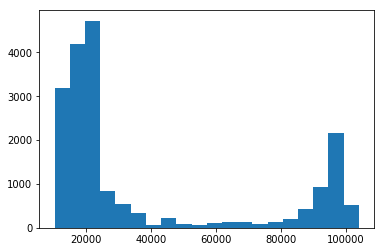

In [175]:
plt.hist(mp_data.loc[(mp_data["NC_TAU_in"] == 1e-12) & (mp_data["NR_TAU_in"]== 1e-12), "pressure"], 
         bins=20)

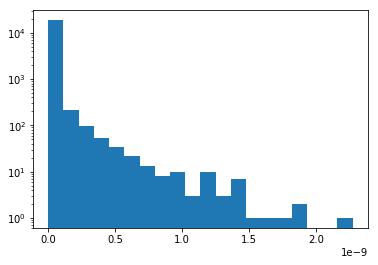

In [181]:
plt.hist(mp_data.loc[(mp_data["NC_TAU_in"] == 1e-12) & (mp_data["NR_TAU_in"]== 1e-12), "qrtend_MG2"], 
         bins=20)
plt.gca().set_yscale("log")

In [186]:
np.count_nonzero((mp_data["QC_TAU_in"] > 0) & (mp_data["QR_TAU_in"] == 0))

2224

In [195]:
mp_data.loc[mp_data["QR_TAU_in"] == 0, ["lev"]].max()

lev    992.556095
dtype: float64

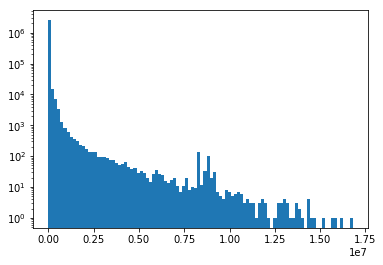

In [198]:
plt.hist(mp_data["lambda_c"], bins=100)
plt.gca().set_yscale("log")

In [201]:
mp_data["lambda_c"].idxmax()

971060

In [202]:
mp_data.loc[971060]

lat                -6.267016e+01
lev                 9.925561e+02
lon                 1.575000e+02
P0                  1.000000e+05
PS                  9.759035e+04
depth               3.100000e+01
row                 2.900000e+01
col                 1.260000e+02
hyam                0.000000e+00
hybm                9.925561e-01
pressure            9.686390e+04
temperature         2.721406e+02
RHO_CLUBB_lev       1.240186e+00
RHO_CLUBB_top       1.235553e+00
RHO_CLUBB_bottom    1.244819e+00
QC_TAU_in           1.125019e-18
NC_TAU_in           3.531460e+07
QR_TAU_in           1.971551e-07
NR_TAU_in           6.471158e+02
qctend_MG2         -1.228579e-36
qctend_TAU          0.000000e+00
nctend_MG2         -9.971658e-13
nctend_TAU          0.000000e+00
qrtend_MG2          1.228579e-36
qrtend_TAU          6.941976e-29
nrtend_MG2         -3.003967e-03
nrtend_TAU         -8.818065e-04
time                2.050000e+01
lambda_c            1.679246e+07
lambda_r            1.698084e+03
Name: 9710

(array([[2.561022e+06, 4.000000e+00, 3.000000e+00, 0.000000e+00,
         0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [3.380000e+03, 7.900000e+01, 5.000000e+00, 0.000000e+00,
         0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [3.890000e+02, 7.200000e+01, 2.500000e+01, 1.000000e+00,
         0.000000e+00, 0.000000e+00, 2.000000e+00, 0.000000e+00,
         0.000000e+00, 1.000000e+00],
        [7.300000e+01, 1.300000e+01, 6.000000e+00, 4.000000e+00,
         7.000000e+00, 2.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 2.000000e+00],
        [2.100000e+01, 5.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 2.000000e+00, 1.000000e+00, 1.000000e+00,
         0.000000e+00, 0.000000e+00],
        [4.000000e+00, 7.000000e+00, 1.000000e+00, 0.000000e+00,
         0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 0.00000

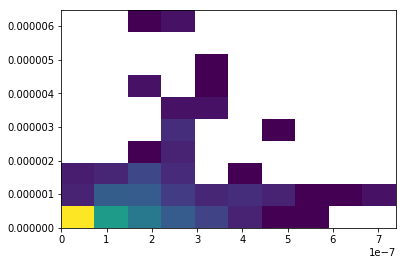

In [253]:
plt.hist2d(mp_data["qrtend_MG2"], mp_data["qrtend_TAU"], norm=LogNorm())

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-5.76510636, -5.65294679, -5.54078721, -5.42862763, -5.31646805,
        -5.20430847, -5.09214889, -4.97998932, -4.86782974, -4.75567016,
        -4.64351058, -4.531351  , -4.41919142, -4.30703185, -4.19487227,
        -4.08271269, -3.97055311, -3.85839353, -3.74623395, -3.63407438,
        -3.5219148 , -3.40975522, -3.29759564, -3.18543606, -3.07327649,
        -2.96111691, -2.84895733, -2.73679775, -2.62463817, -2.51247859,
        -2.40031902, -2.28815944, -2.17599986, -2.06384028, -1.9516807 ,
        -1.83952112, -1.72736155, -1.61520197, -1.50304239, -1.39088281,
        -1.27872323, -1.16656365, -1.05440408, -0.9422445 , -0.83008492,
        -0.71792534, -0.60576576, -0.49360618, -0.38144661, -0.26928703,
        -0.15712745, 

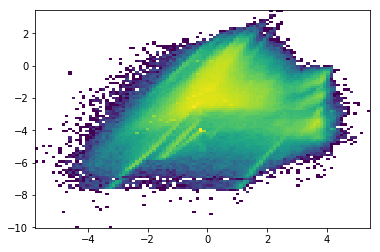

In [262]:
idx = np.where((mp_data["nrtend_MG2"] > 0) & (mp_data["nrtend_TAU"] > 0))[0]
plt.hist2d(np.log10(mp_data.loc[idx, "nrtend_MG2"]), np.log10(mp_data.loc[idx, "nrtend_TAU"]), norm=LogNorm(), bins=100)

In [304]:
np.count_nonzero((mp_data["NR_TAU_in"] + mp_data["nrtend_TAU"] * 1800) < 0)

55159

In [279]:
(mp_data["nctend_MG2"] + mp_data["NC_TAU_in"]).min()

-535476.0

In [301]:
(mp_data["NR_TAU_in"] + mp_data["nrtend_TAU"] * 1800).min()

-3204502.71

In [297]:
(mp_data["QC_TAU_in"] + mp_data["qctend_TAU"]).max()

0.001895990843873

In [319]:
mp_data.loc[(mp_data["NC_TAU_in"] + mp_data["nctend_TAU"] * 1800) < -1e-10, "nctend_TAU"]

190       -5.200292e-01
274       -1.300091e-06
522       -1.638049e-01
590       -5.226310e-04
631       -8.695591e-05
671       -1.356770e+01
699       -2.761221e-06
735       -1.712705e-01
736       -8.360460e-02
737       -3.249481e-03
773       -2.454795e-03
779       -1.835343e-01
780       -1.563806e-02
819       -1.077573e-01
820       -1.236859e+00
821       -7.110676e-02
857       -5.975726e-02
858       -3.280103e-01
861       -1.273777e-04
895       -6.467809e-03
897       -4.550408e-03
898       -7.349476e-05
947       -5.861519e-03
1016      -5.044329e-08
1021      -6.225650e-07
1083      -8.330088e-02
1084      -5.668603e-04
1085      -6.785268e-05
1137      -1.179009e-02
1139      -3.136630e-05
               ...     
2560278   -1.257911e-03
2560312   -1.348119e-01
2560314   -3.782544e-04
2560323   -4.370748e-06
2560345   -2.453537e-06
2560346   -3.185583e-05
2560571   -9.920936e-03
2560963   -1.799856e-02
2560964   -7.333050e-03
2560965   -2.465248e-03
2560966   -5.660

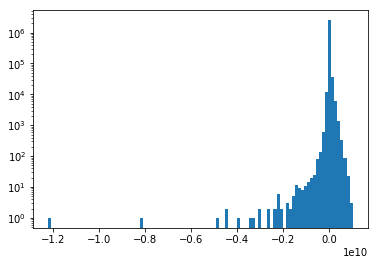

In [312]:
plt.hist((mp_data["NC_TAU_in"] + mp_data["nctend_TAU"] * 1800), bins=100)
plt.gca().set_yscale("log")